In [1]:
#Header: 
    #This Python code facilitates the creation of contour and line plots based on a user-defined mathematical equation. 
    #The program prompts the user to input values for parameters A, B, n, m, phi, and psi, providing the flexibility to enter fractions or whole numbers in the format "numerator/denominator." 
    #The input values are then confirmed by the user before proceeding. The code includes functions for generating contour plots, where the user specifies x and y ranges, and line plots, allowing selection between vertical and horizontal lines. #
    #Fraction handling is achieved through a dedicated function. Plots are saved to the current working directory, and file paths are displayed upon completion. The program operates within a loop, allowing users to run additional plots or exit the program based on their preferences.

In [2]:
#Importing all the nessecary libraries.
import os #used to get current working directory.
import numpy as np #used for math functions and arrays.
import matplotlib.pyplot as plt #used for plotting.

In [3]:
#Defining function for contour and line plots using given equation.
def f(x, y, A, B, n, m, phi, psi):
    return A * np.cos(n*(np.pi)*x + phi) + B * np.cos(m*(np.pi)*y + psi)

In [4]:
#Defining function for contour plot
def plot_contour(x_range, y_range, A, B, n, m, phi, psi, contour_loop):
    #linspace creating 100 point arrays in X-Axis and Y-Axis within the given ranges.
    x = np.linspace(x_range[0], x_range[1], 100)
    y = np.linspace(y_range[0], y_range[1], 100)
    #meshgrid creates a grid of points from the x and y arrays instead of using a for loop.
    X, Y = np.meshgrid(x, y)
    #Calling function f to create Z-Axis.
    Z = f(X, Y, A, B, n, m, phi, psi)
    #contourf, cmap, and colorbar used for contour plot asthetics.
    c_plot = plt.contourf(X, Y, Z, cmap = 'jet')
    plt.colorbar(c_plot, label = 'Function Value')
    #labels and title for ease of reading.
    plt.xlabel('X-Axis')
    plt.ylabel('Y-Axis')
    plt.title('Contour Plot')
    plt.legend('f(x)')
    #outputs plot for user to see.
    plt.show()
    
    #Asks user if they want to save the plot. If they reply with "yes" the plot is saved to the current working directory. If anything else, the plot is not saved.
    save = input("Would you like to save the plot? (Yes/No): ")
    if save == 'yes':
        #repeats the code above to create the plot again but saves it to the current working directory without showing it to the user.
        #contourf, cmap, and colorbar used for contour plot asthetics.
        c_plot = plt.contourf(X, Y, Z, cmap = 'jet')
        plt.colorbar(c_plot, label = 'Function Value')
        #labels and title for ease of reading.
        plt.xlabel('X-Axis')
        plt.ylabel('Y-Axis')
        plt.title('Contour Plot')
        plt.legend('f(x)')

        #saves plot to current working directory and outputs file path to terminal.
        file_name = (f"Contour_plot_{contour_loop}.jpg")
        file_path_Contour = os.path.join(os.getcwd(), file_name)
        plt.savefig(file_path_Contour, format = 'jpg')
        #clears plot so it does not show up in terminal or any parts overlap.
        plt.clf()
    else:
        #if user does not want to save the plot, the function returns that this interation didn't save the plot.
        print("Plot not saved")
        file_path_Contour = "Plot not saved"
    return(file_path_Contour)

In [5]:
#Defining function for line plot.
def plot_line(vertical, fixed_value, range_value, A, B, n, m, phi, psi, horizontal_loop, vertical_loop):
    #linspace function creates 100 point array with the upper and larger range values inputted by the user.
    values = np.linspace(range_value[0], range_value[1], 400)
    #fixed value inputted by user is converted to an array with 100 points so both values have the same dimensions.
    fixed_values = np.full((400,), fixed_value[0])

    #if statement to determine if vertical or horizontal line plot.
    if vertical == 'vertical':
        #sets x-axis to fixed value and y-axis to range of values since x is fixed when vertical. It then names plot accordingly.
        x = fixed_values
        y = values
        label = 'Vertical Line Plot'
        #plots the line using the function f.
        plt.plot(f(x, y, A, B, n, m, phi, psi), y)
        #labels and title for ease of reading.
        plt.xlabel('x' if vertical else 'y')
        plt.ylabel('f(x)' if vertical else 'f(y)')
        plt.title(label)
        plt.legend('f(x)')

        #outputs plot to terminal.
        plt.show()

        #Asks user if they want to save the plot. If they reply with "yes" the plot is saved to the current working directory. If anything else, the plot is not saved.
        save = input("Would you like to save the plot? (Yes/No): ")
        if save == 'yes':
            #repeats the code above to create the plot again but saves it to the current working directory without showing it to the user.
            plt.plot(y, f(x, y, A, B, n, m, phi, psi))
            #labels and title for ease of reading.
            plt.xlabel('x' if vertical else 'y')
            plt.ylabel('f(x)' if vertical else 'f(y)')
            plt.title(label)
            plt.legend('f(x)')

            #saves plot to current working directory and outputs file path to terminal.
            file_name = (f"vertical_line_plot_{vertical_loop}.jpg")
            Vertical_file_path_line = os.path.join(os.getcwd(), file_name)
            plt.savefig(Vertical_file_path_line, format = 'jpg')
            #clears plot so it does not show up in terminal or any parts overlap.
            plt.clf()
        else:
            print("Plot not saved")
            Vertical_file_path_line = "Plot not saved"
        return(Vertical_file_path_line)
    
    else:
        #sets y-axis to fixed value and x-axis to range of values since y is fixed when horizontal. It then names plot accordingly.
        x = values
        y = fixed_values
        label = 'Horizontal Line Plot'
        plt.plot(x, f(x, y, A, B, n, m, phi, psi))
        #labels and title for ease of reading.
        plt.xlabel('x' if vertical else 'y')
        plt.ylabel('f(x)' if vertical else 'f(y)')
        plt.title(label) 
        plt.legend('f(x)')

        #outputs plot to terminal.
        plt.show()

        #Asks user if they want to save the plot. If they reply with "yes" the plot is saved to the current working directory. If anything else, the plot is not saved.
        save = input("Would you like to save the plot? (Yes/No): ")
        if save == 'yes':
            #repeats the code above to create the plot again but saves it to the current working directory without showing it to the user.
            plt.plot(x, f(x, y, A, B, n, m, phi, psi))
            #labels and title for ease of reading.
            plt.xlabel('x' if vertical else 'y')
            plt.ylabel('f(x)' if vertical else 'f(y)')
            plt.title(label)
            plt.legend('f(x)')

            #saves plot to current working directory and outputs file path to terminal.
            file_name = (f"horizontal_line_plot_{horizontal_loop}.jpg")
            Horizontal_file_path_line = os.path.join(os.getcwd(), file_name)
            plt.savefig(Horizontal_file_path_line, format = 'jpg')
            #clears plot so it does not show up in terminal or any parts overlap.
            plt.clf()
        else:
            print("Plot not saved")
            Horizontal_file_path_line = "Plot not saved"
        return(Horizontal_file_path_line)

In [6]:
#defining function to allow user to enter fractions with "/".
#function works by inputting a string and checking if it contains "/". If it does it splits the string into two parts and replaces pi with np.pi. 
#It then converts the two parts into floats and divides them. If the string does not contain "/" it just converts the string into a float.
#This function allows for the user to enter fractions in the format of numerator/denominator or just a number as well as enter pi as a string.
def fraction_check(string):
    detect1 = "/"
    if any(letter in string for letter in detect1):
        numerator_str, denominator_str = string.split("/")
        numerator_str = numerator_str.replace("pi", str(np.pi))
        denominator_str = denominator_str.replace("pi", str(np.pi))
        numerator = float(numerator_str)
        denominator = float(denominator_str)
        string = numerator/denominator
        #returns float of the string inputs.
        return float(string)
    #if the string does not contain "/" it just converts the string into a float and continues.
    else:
        return float(string)

In [7]:
#Sets up two while loop constants that starts the program.
confirmation_var = "re-enter"
run_var = "run"
#Sets up three while loop constants that are used to name the files. They all start at one so they can be increased by one.
contour_loop = 1
vertical_loop = 1
horizontal_loop = 1
#Sets up a list that is used to store the file paths of the plots.
location_list = []

In [8]:
#While loop that allows user to enter values and confirm them. The loop is set to run until the user confirms the values.
#The values are stored to a string variable then passed through the fraction check function convert from fractions to float if needed.
#It then passes the returned float value to another variable that is used in the back end of the program. This is done so when the user confirms the values, they are as they entered them, not in their simplified forms.
#The user is then asked to confirm the values and all values as entered are displayed. If they confirm the values the loop breaks and the program continues. If they do not confirm the values the loop continues.
while confirmation_var.lower() != "confirm": #.lower() is used to make the input case insensitive throughout the entire program for string variables. 
    #Tells user what this program does and prompts them to begin entering values.
    print("This program plots contours and line plots of the function f(x, y) = Acos(nx + phi) + Bcos(my + psi)")
    #Saved to a string variable so the user can confirm the values as entered.
    A_raw = str(input("Enter the value of A (if fraction enter in format: numerator/denominator): "))
    #Connects the string variable to the fraction check function.
    string = A_raw
    #Returned data from the fraction check function is saved to a variable that is used in the back end of the program, not displayed to the user. 
    A = fraction_check(string)
    B_raw = str(input("Enter the value of B (if fraction enter in format: numerator/denominator): "))
    string = B_raw
    B = fraction_check(string)
    m_raw = str(input("Enter the value of m (if fraction enter in format: numerator/denominator): "))
    string = m_raw
    m = fraction_check(string)
    n_raw = str(input("Enter the value of n (if fraction enter in format: numerator/denominator): "))
    string = n_raw
    n = fraction_check(string)
    phi_raw = str(input("Enter the value of phi (if fraction enter in format: numerator/denominator): "))
    string = phi_raw
    phi = fraction_check(string)
    psi_raw = str(input("Enter the value of psi (if fraction enter in format: numerator/denominator): "))
    string = psi_raw
    psi = fraction_check(string)

    #Displays the values as entered and asks the user to confirm or re-enter.
    #If the user confirms the values the loop breaks and the program continues. If they do not confirm the values, the loop restarts.
    confirmation_var = input(f"You entered A = {A_raw}, B = {B_raw}, n = {n_raw}, m = {m_raw}, phi = {phi_raw}, psi = {psi_raw}. Would you like to confirm or re-enter? (Confirm/Re-enter): ")
    if confirmation_var.lower() == "confirm":
        print("Confirmed")
        break
    else:
        print("Please Re-enter")

This program plots contours and line plots of the function f(x, y) = Acos(nx + phi) + Bcos(my + psi)


Enter the value of A (if fraction enter in format: numerator/denominator):  2
Enter the value of B (if fraction enter in format: numerator/denominator):  1
Enter the value of m (if fraction enter in format: numerator/denominator):  3/2
Enter the value of n (if fraction enter in format: numerator/denominator):  5
Enter the value of phi (if fraction enter in format: numerator/denominator):  pi/4
Enter the value of psi (if fraction enter in format: numerator/denominator):  -pi/3
You entered A = 2, B = 1, n = 5, m = 3/2, phi = pi/4, psi = -pi/3. Would you like to confirm or re-enter? (Confirm/Re-enter):  confirm


Confirmed


Do you want a Contour plot or a Line plot? (Contour/Line):  contour
Enter x range start (Pi included):  10
Enter x range end (Pi included):  -10
Enter y range start (Pi included):  10
Enter y range end (Pi included):  -10


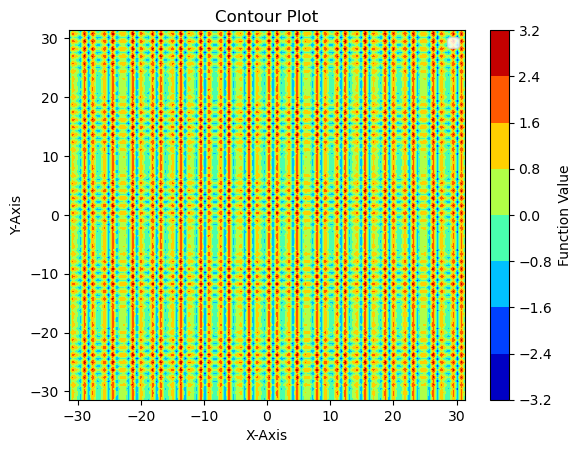

Would you like to save the plot? (Yes/No):  yes
Would you like to run again? (Yes/No):  yes


Restarting


Do you want a Contour plot or a Line plot? (Contour/Line):  line
Vertical or Horizontal? (Vertical/Horizontal):  vertical
Enter the fixed value (Pi included):  5
Enter the range start (Pi included):  10
Enter the range end (Pi included):  -10


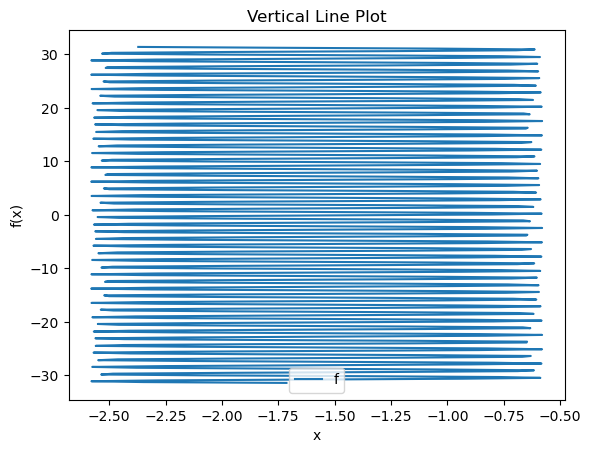

Would you like to save the plot? (Yes/No):  yes
Would you like to run again? (Yes/No):  yes


Restarting


Do you want a Contour plot or a Line plot? (Contour/Line):  line
Vertical or Horizontal? (Vertical/Horizontal):  horizontal
Enter the fixed value (Pi included):  5
Enter the range start (Pi included):  10
Enter the range end (Pi included):  -10


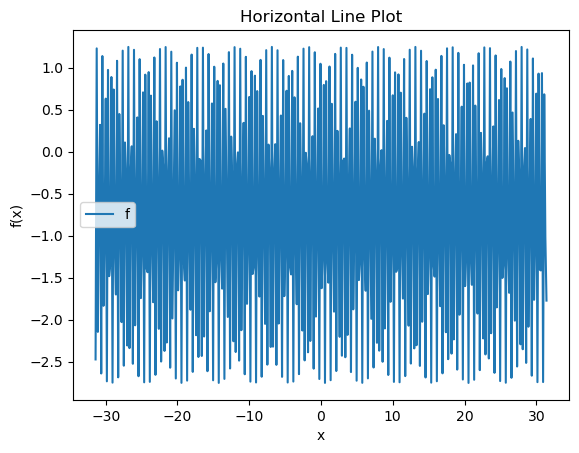

Would you like to save the plot? (Yes/No):  yes
Would you like to run again? (Yes/No):  no


<Figure size 640x480 with 0 Axes>

In [9]:
#While loop that allows user to choose between contour and line plots
while run_var.lower() != "exit":
    #Asks user what kind of plot they want and saves it to a string variable that is then evaluated in an if statement.
    plot = str(input("Do you want a Contour plot or a Line plot? (Contour/Line): "))
    #If statment that evaluates the contour line and runs the contour plot function.
    if plot.lower() == "contour":
        #Asks user for x and y ranges and saves them to a list. The list is then multiplied by pi.
        x_range = [float(input("Enter x range start (Pi included): ")), float(input("Enter x range end (Pi included): "))]
        x_range = [x_range[0]*np.pi, x_range[1]*np.pi]
        y_range = [float(input("Enter y range start (Pi included): ")), float(input("Enter y range end (Pi included): "))]
        y_range = [y_range[0]*np.pi, y_range[1]*np.pi]
        #Calls the contour plot function and saves the file path to a variable.
        contour_location = plot_contour(x_range, y_range, A, B, n, m, phi, psi, contour_loop)
        #Appends the file path to a list so that it can be later outputted. The file is formated to included the plots number in the file name.
        location_list.append(str(f"Contour file location {contour_loop}: " + contour_location))
        #Increases the loop constant by one so that the next plot is saved with the next number.
        contour_loop += 1
        #Asks user if they want to run again. If they reply with "no" the loop ends and moves to next part of the code. If anything else, they return to the linetype selection memu.
        run_var = input("Would you like to run again? (Yes/No): ")
        if run_var.lower() == "no":
            break
        else:
            print("Restarting")

    #If statment that evaluates the line plot and runs the line plot function.
    elif plot.lower() == "line":
        vertical = input("Vertical or Horizontal? (Vertical/Horizontal): ").lower()
        if vertical == "vertical":
            fixed_value = float(input("Enter the fixed value (Pi included): "))
            #Multiplies the fixed value by pi since values evaluated in the function are in factors of pi.
            fixed_value = (fixed_value*np.pi)
            fixed_value = np.array([fixed_value])
            range_value = [float(input("Enter the range start (Pi included): ")), float(input("Enter the range end (Pi included): "))]
            range_value = [range_value[0]*np.pi, range_value[1]*np.pi]
            #Calls the contour plot function and saves the file path to a variable.
            vertical_line_locations = plot_line(vertical,fixed_value, range_value, A, B, n, m, phi, psi, horizontal_loop, vertical_loop)
            #Appends the file path to a list so that it can be later outputted. The file is formated to included the plots number in the file name.
            location_list.append(str(f'Vertical file location {vertical_loop}: ' + vertical_line_locations))
            #Increases the loop constant by one so that the next plot is saved with the next number.
            vertical_loop += 1
        if vertical == "horizontal":
            fixed_value = float(input("Enter the fixed value (Pi included): "))
            #Multiplies the fixed value by pi since values evaluated in the function are in factors of pi.
            fixed_value = (fixed_value*np.pi)
            fixed_value = np.array([fixed_value])
            range_value = [float(input("Enter the range start (Pi included): ")), float(input("Enter the range end (Pi included): "))]
            range_value = [range_value[0]*np.pi, range_value[1]*np.pi]
            #Calls the contour plot function and saves the file path to a variable.
            horizontal_line_locations = plot_line(vertical,fixed_value, range_value, A, B, n, m, phi, psi, horizontal_loop, vertical_loop)
            #Appends the file path to a list so that it can be later outputted. The file is formated to included the plots number in the file name.
            location_list.append(str(f"Horizontal file location {horizontal_loop}: ") + horizontal_line_locations)
            #Increases the loop constant by one so that the next plot is saved with the next number.
            horizontal_loop += 1
        #Asks user if they want to run again. If they reply with "no" the loop ends and moves to next part of the code. If anything else, they return to the linetype selection memu.
        run_var = input("Would you like to run again? (Yes/No): ")
        if run_var.lower() == "no":
            break
        else:
            print("Restarting")
    else:
        print("Invalid choice. Please try again.")

In [10]:
#If the user chooses to exit the program, the loop ends and the program ends.
#multiline variable is created to display the file paths each in their own line.
multiline = '\n'.join(location_list)
#Outputs file path list and annouces program is ending.
print("Lists of file paths for plots:" + '\n' + str(multiline))
print("Exiting Program")

Lists of file paths for plots:
Contour file location 1: C:\Users\maxed\Contour_plot_1.jpg
Vertical file location 1: C:\Users\maxed\vertical_line_plot_1.jpg
Horizontal file location 1: C:\Users\maxed\horizontal_line_plot_1.jpg
Exiting Program
